# ATDA 5340 - Final - Part 5 - ML Supervised - Denis Shilkin
<br>The dataset adult_salary.csv
<br> Decision tree (Classification) to predict if income more 50000 or less than 50000

## 1. Import libraries

In [1]:
# import libraries 
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from matplotlib import pyplot

#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# supress warnings
import warnings
warnings.filterwarnings("ignore")




In [2]:
filename = "adult_salary.csv"

df = pd.read_csv(filename, index_col=False)

print(df.shape)

(48842, 15)


In [3]:
print(df.head(5))

   Age           Emp_type  Fnlwgt   Education  Education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

               Marital          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_gain  Capital_loss  weekly_hours         Country  Income  
0          2174             0            40   United-States   <=50K  


In [4]:
df2 = df[["Age","Emp_type","Education","Education_num","Marital","Occupation","Relationship",
       "Race","Sex","Capital_gain","Capital_loss","weekly_hours","Country","Income"]]
print(df2.shape)

(48842, 14)


In [5]:
print(df2.head(5))

   Age           Emp_type   Education  Education_num              Marital  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   Capital_loss  weekly_hours         Country  Income  
0             0            40   United-States   

In [6]:
print(df2.isnull().sum())

Age              0
Emp_type         0
Education        0
Education_num    0
Marital          0
Occupation       0
Relationship     0
Race             0
Sex              0
Capital_gain     0
Capital_loss     0
weekly_hours     0
Country          0
Income           0
dtype: int64


In [7]:
print(df2.groupby('Income').size())

Income
 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
dtype: int64


In [8]:
df2[['Income']]=df2[['Income']].replace(" <=50K.","less 50")
df2[['Income']]=df2[['Income']].replace(" >50K.","more 50")
df2[['Income']]=df2[['Income']].replace(" <=50K","less 50")
df2[['Income']]=df2[['Income']].replace(" >50K","more 50")
print(df2.groupby('Income').size())

Income
less 50    37155
more 50    11687
dtype: int64


In [9]:
print(df2.describe())

                Age  Education_num  Capital_gain  Capital_loss  weekly_hours
count  48842.000000   48842.000000  48842.000000  48842.000000  48842.000000
mean      38.643585      10.078089   1079.067626     87.502314     40.422382
std       13.710510       2.570973   7452.019058    403.004552     12.391444
min       17.000000       1.000000      0.000000      0.000000      1.000000
25%       28.000000       9.000000      0.000000      0.000000     40.000000
50%       37.000000      10.000000      0.000000      0.000000     40.000000
75%       48.000000      12.000000      0.000000      0.000000     45.000000
max       90.000000      16.000000  99999.000000   4356.000000     99.000000


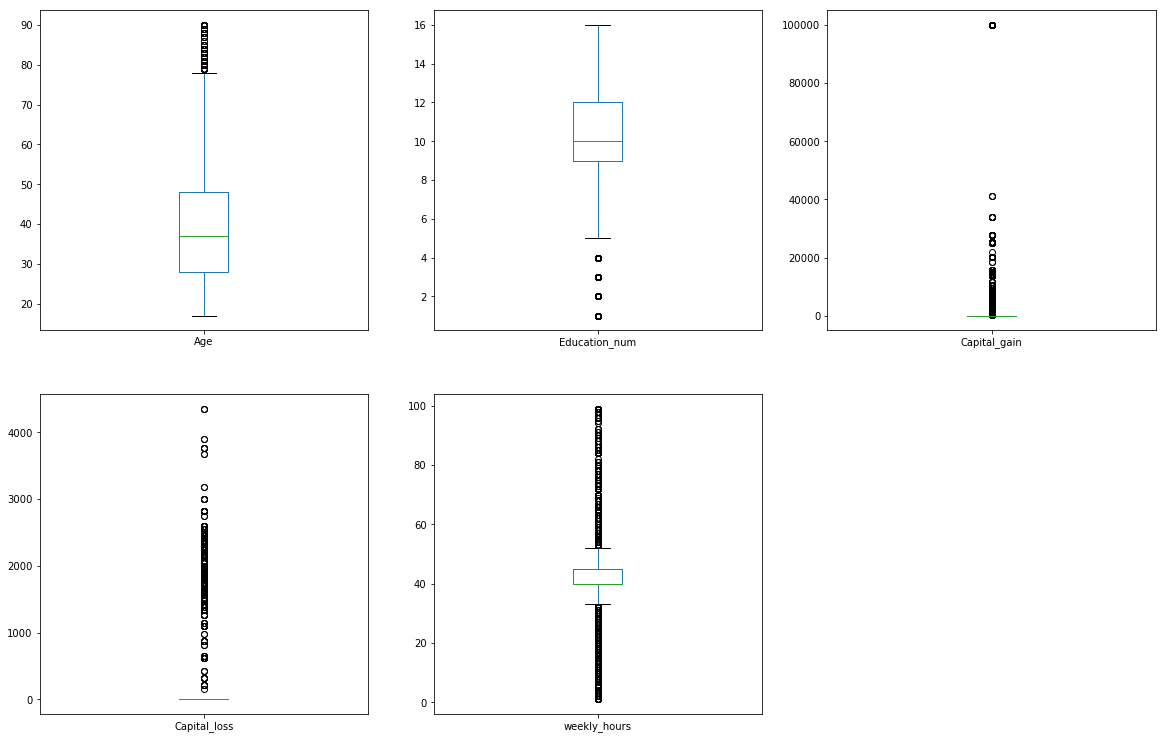

In [10]:
df2.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20))
pyplot.show()

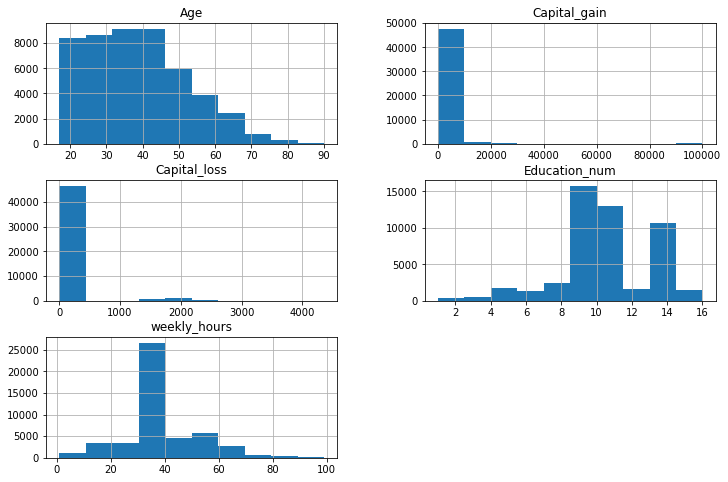

In [11]:
df2.hist(figsize=(12, 8))
pyplot.show()

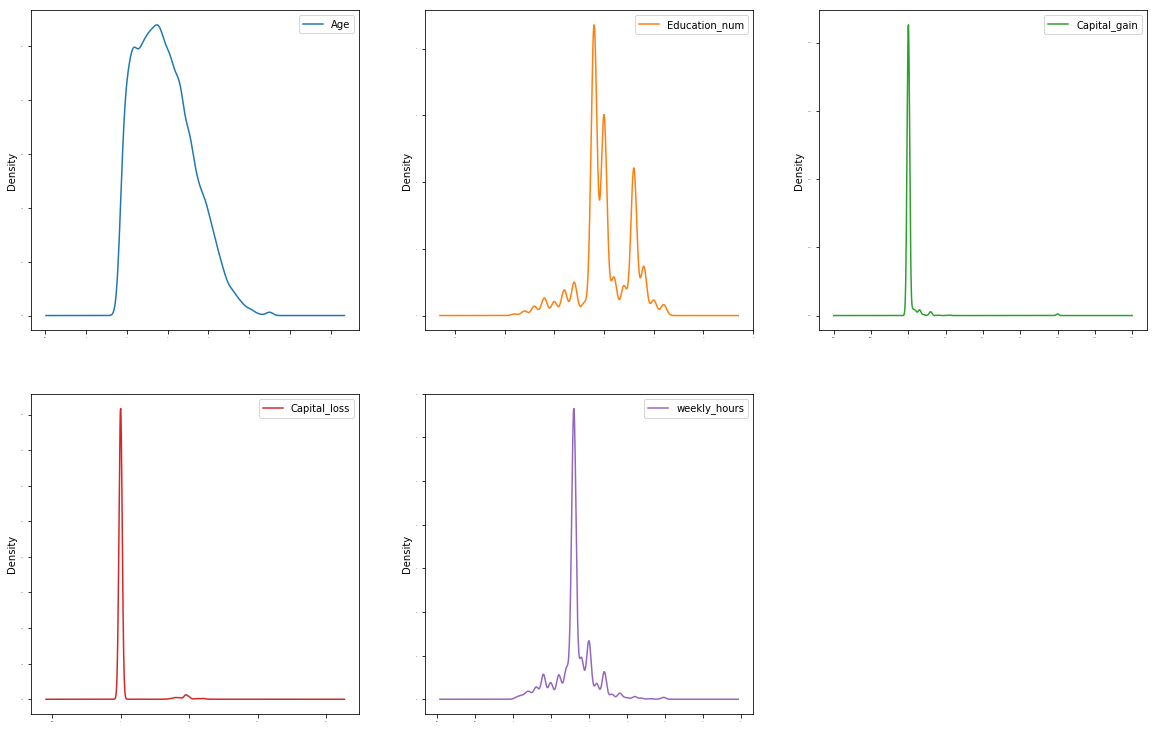

In [12]:
df2.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(20,20))
pyplot.show()

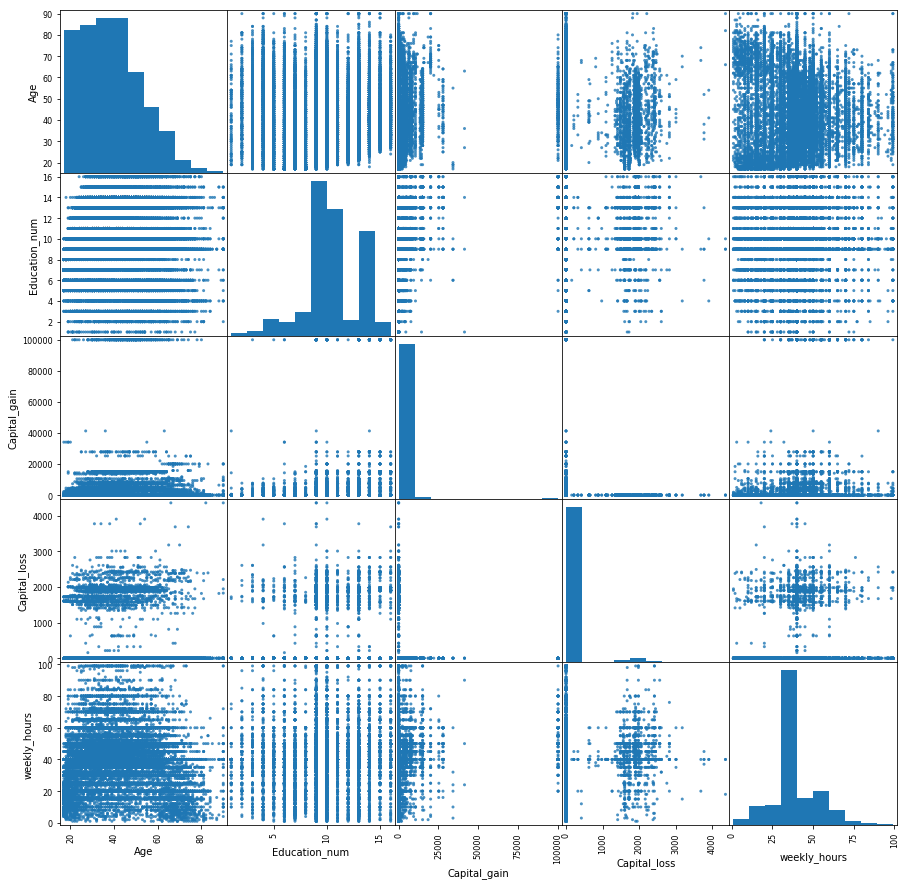

In [13]:
scatter_matrix(df2, alpha=0.8, figsize=(15,15))
pyplot.show()

In [14]:
array = df.values

X = array [:,0:13]
Y = array [:,13]

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=seed)

model = KNeighborsClassifier()

In [15]:
model.fit(X_train, Y_train)

ValueError: could not convert string to float: ' Private'